In [4]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

# Leer el archivo de texto
with open('chat.txt', 'r') as f:
    chat = f.read()

# This new list (new_chat) is gonna store individual messages after every new line(\n)
new_chat = []
a = 0
b = 0

#The string variable is split at each carriage return and separates the messages into a list.
while chat.find('\n', a+1) != -1:
    a = chat.find('\n',b)
    b = chat.find('\n',a+1)
    new_chat.append(chat[a+1:b])


# new list that will not include the time and date
cleaned_chat = []
no_valid_data = 0
eliminados = []
sin_colon = []

for i in range(len(new_chat)):
    # Messages has at least 2 colons, that's why I'm filtering if there is only one and has a date with 2 '/'
      if (new_chat[i].count(':') == 1 and new_chat[i].count('/')==2) :
          no_valid_data = no_valid_data + 1
          sin_colon.append(new_chat[i])
      else:
          # Findind the positions of the colons, slash, and the hyphen
          first_colon = new_chat[i].find(':')
          second_colon = new_chat[i].find(':',first_colon+1)
          slash = new_chat[i].find('/')
          
          # 10/4/22, 08:42 - Ottavio Oludovisi: Great I just arrived
          comment = new_chat[i][second_colon+2:]
          
          # With the amount of slash we can know if there is a link in the message
          if (comment.count('/')<3):
              cleaned_chat.append(comment)
          else: 
              eliminados.append(comment)
              no_valid_data = no_valid_data + 1


chat_str = ' '.join(cleaned_chat)

nlp = spacy.load("en_core_web_sm")
doc_1 = nlp(chat_str)

# Definir una lista de palabras para agregar al conjunto (set)
add_stop_words = ['medium', 'omit','media']

# Agregar las palabras de la lista al conjunto (set) usando el método update()
STOP_WORDS.update(add_stop_words)

filtrado = []

for token in doc_1:
    if (token.is_alpha) and not(token.lemma_.lower() in STOP_WORDS):
        filtrado.append(token.text.lower())


words_as_string = ' '.join(filtrado)

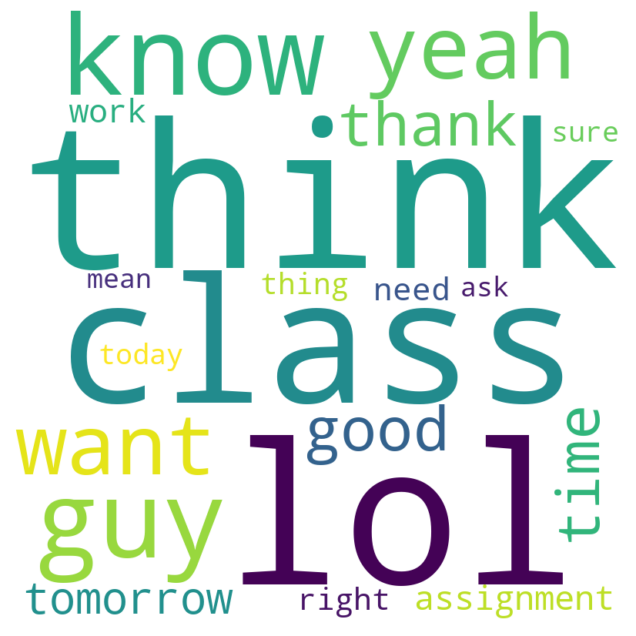

In [5]:
# Crear el objeto WordCloud con las opciones deseadas
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, max_words=20).generate(words_as_string)

# Visualizar el WordCloud generado
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()